<a href="https://colab.research.google.com/github/kyhong0528/IT_system/blob/master/IT_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
'''
mnist 데이터 불러오기
'''
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
'''
데이터 설정
'''
input_shape = (28, 28, 1)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

'''
epoch,batch 사이즈 설정
'''
batch_size = 100
epochs = 3

'''
cnn network
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

'''
모델 컴파일,저장
'''
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rlt = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

model.save('mnist.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 186s 3ms/step - loss: 0.2364 - accuracy: 0.9275 - val_loss: 0.0550 - val_accuracy: 0.9830
Epoch 2/3
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0843 - accuracy: 0.9742 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 3/3
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0634 - accuracy: 0.9814 - val_loss: 0.0339 - val_accuracy: 0.9888


In [36]:
'''
mnist 데이터 불러오기
'''
!git clone https://github.com/sorki/python-mnist
!./python-mnist/get_data.sh
!pip3 install emnist

from emnist import extract_training_samples
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

X, y = extract_training_samples('letters')
'''
데이터 설정
'''
input_shape = (28, 28, 1)
X = X / 255.
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 28)
y_test = keras.utils.to_categorical(y_test, 28)
'''
epoch,batch 사이즈 설정
'''
batch_size = 100
epochs = 3

'''
cnn network
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

'''
모델 컴파일,저장
'''
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(X_test, y_test))

model.save('emnist.h5')

fatal: destination path 'python-mnist' already exists and is not an empty directory.
/bin/bash: ./python-mnist/get_data.sh: No such file or directory
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 470s 8ms/step - loss: 0.6243 - accuracy: 0.8058 - val_loss: 0.2659 - val_accuracy: 0.9091
Epoch 2/3
60000/60000 [==============================] - 473s 8ms/step - loss: 0.2941 - accuracy: 0.9031 - val_loss: 0.2037 - val_accuracy: 0.9317
Epoch 3/3
60000/60000 [==============================] - 473s 8ms/step - loss: 0.2312 - accuracy: 0.9204 - val_loss: 0.1901 - val_accuracy: 0.9362


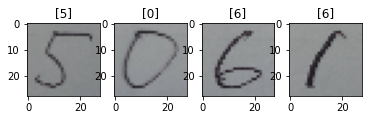

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
'''
손글씨 사진 가져오기
'''
img = cv2.imread("/content/drive/My Drive/dataset/20200614_051626.jpg")
'''
사진 가공
'''
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_2 = cv2.GaussianBlur(img_1, (5, 5), 0)
'''
이미지 경계 찾기
'''
r,img_3 = cv2.threshold(img_2,118, 230, cv2.THRESH_BINARY_INV)
contours,h = cv2.findContours(img_3.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

'''
경계를 사각형으로
'''
rec = [cv2.boundingRect(i) for i in contours]
rec = [(x,y,w,h) for (x,y,w,h) in rec if (w*h>10)]

'''
사각형 그리기
'''
img_result = []
img_for_class = img.copy()
margin_pixel = 60

for i in rec:
    # Draw the rectangles
  img_result.append(
        img_for_class[i[1]-margin_pixel : i[1]+i[3]+margin_pixel, 
                      i[0]-margin_pixel : i[0]+i[2]+margin_pixel])
  cv2.rectangle(img, (i[0], i[1]), 
                  (i[0] + i[2], i[1] + i[3]), (255, 0, 0), 3) 
  
  



c = 0
model = load_model('mnist.h5')#파라미터 불러오기
'''
예측 및 출력
'''
for n in img_result:
    c += 1
    pic = cv2.resize(img_result[c-1], (28,28))[:,:,1]
    pic = (pic < 110) * pic
    pic = pic.astype('float32') / 255.
    pic = pic.reshape((1, 28, 28, 1))
    rlt = model.predict_classes(pic)
    plt.subplot(1, 4, c)    
    plt.imshow(cv2.resize(n,(28,28)))
    plt.title(rlt)

plt.show()









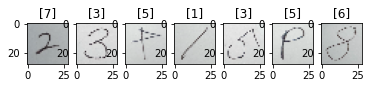

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

'''
손글씨 사진 가져오기
'''
img = cv2.imread("/content/drive/My Drive/dataset/20200617_024029.jpg")
'''
사진 가공
'''
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_2 = cv2.GaussianBlur(img_1, (5, 5), 0)
M = np.ones(img_blur.shape, dtype = "uint8") * 100 
img_3 = cv2.add(img_2, M)                       

'''
이미지 경계 찾기
'''
r, img_4 = cv2.threshold(img_3,250, 300, cv2.THRESH_BINARY_INV)
contours,h= cv2.findContours(img_4.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
'''
경계를 사각형으로
'''
rec = [cv2.boundingRect(i) for i in contours]
rec= [(x,y,w,h) for (x,y,w,h) in rec if (w*h>700 and w*h<400000 )]

'''
사각형 그리기
'''

img_result = []
img_for_class = img.copy()
margin_pixel = 60

for i in rec:
    # Draw the rectangles
  img_result.append(
        img_for_class[i[1]-margin_pixel : i[1]+i[3]+margin_pixel, 
                      i[0]-margin_pixel : i[0]+i[2]+margin_pixel])
  cv2.rectangle(img, (i[0], i[1]), 
                  (i[0] + i[2], i[1] + i[3]), (255, 0, 0), 3) 


c = 0
model = load_model('mnist.h5')#파라미터 불러오기
'''
예측 및 출력
'''
for n in img_result:
    c += 1
    pic = cv2.resize(img_result[c-1], (28,28))[:,:,1]
    pic = (pic < 200) * pic
    pic = pic.astype('float32') / 255.
    pic = pic.reshape((1, 28, 28, 1))
    rlt = model.predict_classes(pic)
    plt.subplot(1, 7, c)    
    plt.imshow(cv2.resize(n,(28,28)))
    plt.title(rlt)

plt.show()



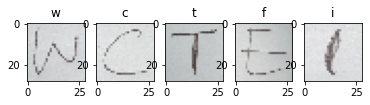

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

'''
손글씨 사진 가져오기
'''
img = cv2.imread("/content/drive/My Drive/dataset/20200615_031940.jpg")
'''
사진 가공
'''
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_2= cv2.GaussianBlur(img_1, (5, 5), 0)

'''
이미지 경계 찾기
'''
r, img_3 = cv2.threshold(img_2,170, 230, cv2.THRESH_BINARY_INV)
contours, h= cv2.findContours(img_3.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
'''
경계를 사각형으로
'''
rec = [cv2.boundingRect(i) for i in contours]
rec = [(x,y,w,h) for (x,y,w,h) in rec if (w*h>10000 and w*h<400000 )]

'''
사각형 그리기
'''
img_result = []
img_for_class = img.copy()
margin_pixel = 60

for i in rec:
    # Draw the rectangles
  img_result.append(
        img_for_class[i[1]-margin_pixel : i[1]+i[3]+margin_pixel, 
                      i[0]-margin_pixel : i[0]+i[2]+margin_pixel])
  cv2.rectangle(img, (i[0], i[1]), 
                  (i[0] + i[2], i[1] + i[3]), (255, 0, 0), 3) 


c = 0
model = load_model('emnist.h5')#파라미터 불러오기
'''
예측 및 출력
'''
for n in img_result:
    c += 1
    pic = cv2.resize(img_result[c-1], (28,28))[:,:,1]
    pic = (pic < 185) * pic
    pic = pic.astype('float32') / 255.
    pic = pic.reshape((1, 28, 28, 1))
    rlt = str(chr(model.predict_classes(pic)+96))
    plt.subplot(1, 5, c)    
    plt.imshow(cv2.resize(n,(28,28)))
    plt.title(rlt)

plt.show()

